In [1]:
import numpy as np
import json

In [2]:
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
root_folder = '/home/data/lyt/Visual7W'
img_folder = '{}/images'.format(root_folder)

In [4]:
anno_point_file = '{}/v7w_{}_answers.json'.format(root_folder, 'pointing')
anno_tell_file  = '{}/v7w_{}_answers.json'.format(root_folder, 'telling')
ques_point_file = '{}/dataset_v7w_{}.json'.format(root_folder, 'pointing')
ques_tell_file  = '{}/dataset_v7w_{}.json'.format(root_folder, 'telling')

In [5]:
anno_point = json.load(open(anno_point_file, 'r'))
anno_tell  = json.load(open(anno_tell_file, 'r'))
ques_point = json.load(open(ques_point_file, 'r'))
ques_tell  = json.load(open(ques_tell_file, 'r'))

In [6]:
#===============anno_point================

In [7]:
print(anno_point.keys())
print('dataset: {}'.format(anno_point['dataset']))
print('version: {}'.format(anno_point['version']))
boxes = anno_point['boxes']
print('#boxes: {}'.format(len(boxes)))

dict_keys(['boxes', 'version', 'dataset'])
dataset: Visual7W-pointing
version: 1.0
#boxes: 308407


In [8]:
box = np.random.choice(boxes)
print(box.keys())
for k in box.keys():
    print('{}: {}'.format(k, box[k]))

dict_keys(['box_id', 'name', 'height', 'width', 'y', 'x'])
box_id: 468884
name: backboard
height: 79
width: 52
y: 68
x: 203


In [9]:
#===============anno_tell================

In [10]:
print(anno_tell.keys())
print('dataset: {}'.format(anno_tell['dataset']))
print('version: {}'.format(anno_tell['version']))
boxes = anno_tell['boxes']
print('#boxes: {}'.format(len(boxes)))

dict_keys(['boxes', 'version', 'dataset'])
dataset: Visual7W-telling
version: 1.0
#boxes: 121464


In [11]:
box = np.random.choice(boxes)
print(box.keys())
for k in box.keys():
    print('{}: {}'.format(k, box[k]))

dict_keys(['name', 'height', 'width', 'qa_id', 'y', 'x'])
name: person
height: 134
width: 42
qa_id: 91714
y: 403
x: 501


In [12]:
#===============ques_point================

In [13]:
print(ques_point.keys())
print('dataset: {}'.format(ques_point['dataset']))
print('version: {}'.format(ques_point['version']))
imges = ques_point['images']
boxes = ques_point['boxes']
print('#imges: {}'.format(len(imges)))
print('#boxes: {}'.format(len(boxes)))

dict_keys(['images', 'boxes', 'version', 'dataset'])
dataset: Visual7W-pointing
version: 1.0
#imges: 25733
#boxes: 308407


In [14]:
box = np.random.choice(boxes)
print(box.keys())
for k in box.keys():
    print('{}: {}'.format(k, box[k]))

box_dict = {}
for box in boxes:
    box_id = box['box_id']
    if box_id not in box_dict:
        box_dict[box_id] = {'cls': box['name'],
                         'h': box['height'],
                         'w': box['width'],
                         'x': box['x'],
                         'y': box['y']}

dict_keys(['box_id', 'name', 'height', 'width', 'y', 'x'])
box_id: 894572
name: stripe
height: 48
width: 36
y: 187
x: 229


In [15]:
im = np.random.choice(imges)
print(im.keys())
for k in im.keys():
    if k != 'qa_pairs':
        print('{}: {}'.format(k, im[k]))
print('===========================')
print('#qa_pairs: {}'.format(len(im['qa_pairs'])))
j = 0
print('qa_pairs[{}]: {}'.format(j, im['qa_pairs'][j]))
j = 1
print('qa_pairs[{}]: {}'.format(j, im['qa_pairs'][j]))

dict_keys(['qa_pairs', 'image_id', 'split', 'filename'])
image_id: 2370710
split: train
filename: v7w_2370710.jpg
#qa_pairs: 4
qa_pairs[0]: {'answer': 602158, 'multiple_choices': [602177, 602174, 602188], 'qa_id': 279280, 'type': 'which', 'question': 'Which is the dog lying down?'}
qa_pairs[1]: {'answer': 602189, 'multiple_choices': [602174, 602177, 602180], 'qa_id': 163944, 'type': 'which', 'question': 'Which object is under the dog?'}


In [16]:
img = imread('{}/{}'.format(img_folder, im['filename']))
# print(img.shape)

Which object is under the dog?
√stick
×tree
×sign
×tree


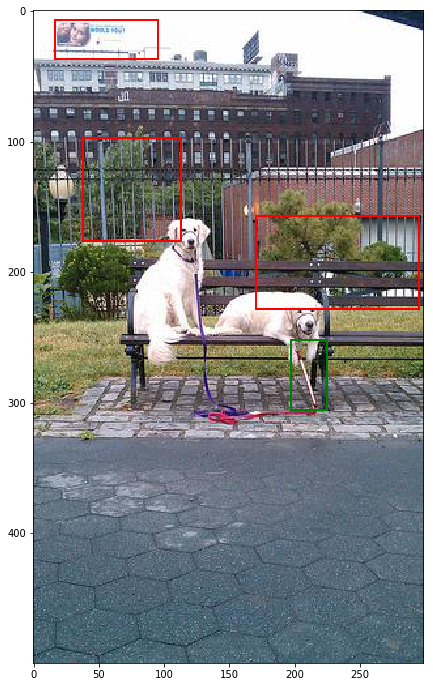

In [17]:
qa = np.random.choice(im['qa_pairs'])

fig,ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)
ques = qa['question']
print(ques)
ans_box_id = qa['answer']
cls = box_dict[ans_box_id]['cls']
print('√{}'.format(cls))
loc = (box_dict[ans_box_id]['x'], box_dict[ans_box_id]['y'])
w, h = box_dict[ans_box_id]['w'], box_dict[ans_box_id]['h']
ax.add_patch(Rectangle(loc, w, h, linewidth=2,edgecolor='g',facecolor='none'))
other_box_ids = qa['multiple_choices']
for obox_id in other_box_ids:
    cls = box_dict[obox_id]['cls']
    print('×{}'.format(cls))
    loc = (box_dict[obox_id]['x'], box_dict[obox_id]['y'])
    w, h = box_dict[obox_id]['w'], box_dict[obox_id]['h']
    ax.add_patch(Rectangle(loc, w, h, linewidth=2,edgecolor='r',facecolor='none'))
plt.show()

In [18]:
#===============ques_tell================

In [19]:
print(ques_tell.keys())
print('dataset: {}'.format(ques_tell['dataset']))
print('version: {}'.format(ques_tell['version']))
imges = ques_tell['images']
print('#imges: {}'.format(len(imges)))

dict_keys(['images', 'version', 'dataset'])
dataset: Visual7W-telling
version: 1.1
#imges: 28653


In [20]:
im = np.random.choice(imges)
print(im.keys())
for k in im.keys():
    if k != 'qa_pairs':
        print('{}: {}'.format(k, im[k]))
print('===========================')
print('#qa_pairs: {}'.format(len(im['qa_pairs'])))
j = 0
print('qa_pairs[{}]: {}'.format(j, im['qa_pairs'][j]))
j = 1
print('qa_pairs[{}]: {}'.format(j, im['qa_pairs'][j]))

dict_keys(['qa_pairs', 'image_id', 'split', 'filename'])
image_id: 2399752
split: train
filename: v7w_2399752.jpg
#qa_pairs: 5
qa_pairs[0]: {'image_id': 2399752, 'question': 'Why is the man smiling?', 'multiple_choices': ['He is excited.', 'He is filled with joy.', 'He is in love.'], 'qa_id': 539776, 'answer': 'He is happy.', 'type': 'why'}
qa_pairs[1]: {'image_id': 2399752, 'question': 'Who is on the bike?', 'multiple_choices': ['A man.', 'A woman.', 'A boy.'], 'qa_id': 539778, 'answer': 'Noone.', 'type': 'who'}


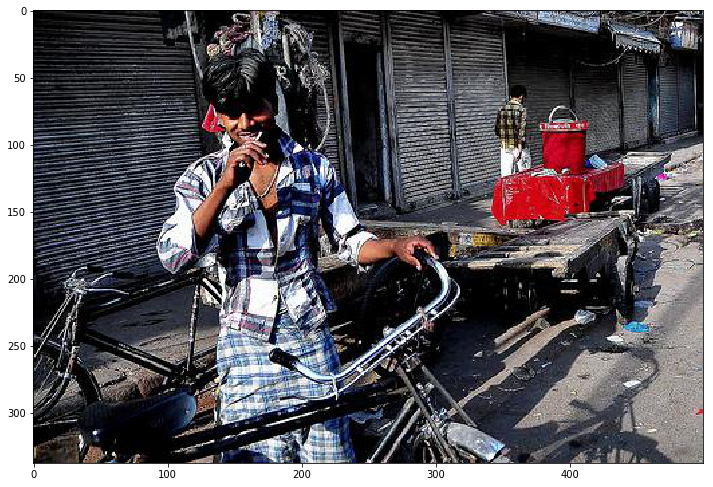

In [21]:
img = imread('{}/{}'.format(img_folder, im['filename']))
# print(img.shape)
fig,ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)
plt.show()

In [22]:
qa = np.random.choice(im['qa_pairs'])
ques = qa['question']
print(ques)
gt_ans = qa['answer']
other_ans = qa['multiple_choices']
print('√{}'.format(gt_ans))
for o_ans in other_ans:
    print('×{}'.format(o_ans))

What is on the red pulley?
√A red barrel.
×A red jar.
×A red crate.
×A red stand.
